## Vision Studio Demo

### Pre-requisites
- Δημιουργία ενός Computer Vision resource στο Azure
- Δημιουργία ενός .env αρχείου με τα στοιχεία του resource (Endpoint, Key) στον φάκελο του project

In [12]:
# Authentication
%pip install azure-ai-vision

import azure.ai.vision as sdk
import os
from dotenv import load_dotenv
from PIL import Image
import matplotlib.pyplot as plt

load_dotenv()
service_options = sdk.VisionServiceOptions(os.getenv('CV_ENDPOINT'), os.getenv('CV_KEY'))

Note: you may need to restart the kernel to use updated packages.


Exception ignored in: <function ImageAnalyzer.__del__ at 0x000002756979ED40>
Traceback (most recent call last):
  File "C:\Users\ksiti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\azure\ai\vision\image_analysis_client.py", line 801, in __del__
    if _sdk_lib.vision_session_view_handle_is_valid(self._handle) is None:
  File "C:\Users\ksiti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\azure\ai\vision\image_analysis_client.py", line 813, in _handle
    return self.__handle.get()
AttributeError: 'ImageAnalyzer' object has no attribute '_ImageAnalyzer__handle'


In [15]:
# Επιλογή εικόνας για ανάλυση
original_image = 'images/turtle-coral-reef.jpg'
vision_source = sdk.VisionSource(filename=original_image)

# Επιλογή τύπου ανάλυσης

## Αφαίρεση του background

### Δημιουργία caption για την εικόνα
analysis_options = sdk.ImageAnalysisOptions()

analysis_options.segmentation_mode = sdk.ImageSegmentationMode.BACKGROUND_REMOVAL

# Εμφάνιση της αρχικής εικόνας
plt.imshow(Image.open(original_image))
plt.axis("off")
plt.show()

 Segmentation result:
   Output image buffer size (bytes) = 1872628
   Output image height = 699
   Output image width = 979
   File output/image_without_bg.png written to disk


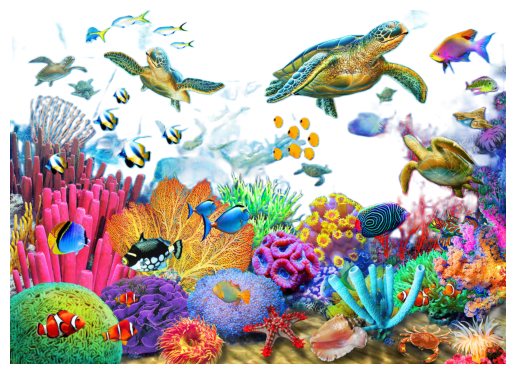

In [16]:
image_analyzer = sdk.ImageAnalyzer(service_options, vision_source, analysis_options)

result = image_analyzer.analyze()

if result.reason == sdk.ImageAnalysisResultReason.ANALYZED:

    image_buffer = result.segmentation_result.image_buffer
    print(" Segmentation result:")
    print("   Output image buffer size (bytes) = {}".format(len(image_buffer)))
    print("   Output image height = {}".format(result.segmentation_result.image_height))
    print("   Output image width = {}".format(result.segmentation_result.image_width))

    output_image_file = "output/image_without_bg.png"
    with open(output_image_file, 'wb') as binary_file:
        binary_file.write(image_buffer)
    print("   File {} written to disk".format(output_image_file));

else:

    error_details = sdk.ImageAnalysisErrorDetails.from_result(result)
    print(" Analysis failed.")
    print("   Error reason: {}".format(error_details.reason))
    print("   Error code: {}".format(error_details.error_code))
    print("   Error message: {}".format(error_details.message))
    print(" Did you set the computer vision endpoint and key?")


# Εμφάνιση της δημιουργημένης εικόνας
plt.imshow(Image.open(output_image_file))
plt.axis("off")
plt.show()

In [22]:
vision_source = sdk.VisionSource(filename='output/image_without_bg.png')
analysis_options = sdk.ImageAnalysisOptions()

analysis_options.features = (
    sdk.ImageAnalysisFeature.CROP_SUGGESTIONS |
    sdk.ImageAnalysisFeature.CAPTION |
    sdk.ImageAnalysisFeature.DENSE_CAPTIONS |
    sdk.ImageAnalysisFeature.OBJECTS |
    sdk.ImageAnalysisFeature.PEOPLE |
    sdk.ImageAnalysisFeature.TEXT |
    sdk.ImageAnalysisFeature.TAGS
)


image_analyzer = sdk.ImageAnalyzer(service_options, vision_source, analysis_options)

result = image_analyzer.analyze()

if result.reason == sdk.ImageAnalysisResultReason.ANALYZED:

    print(" Image height: {}".format(result.image_height))
    print(" Image width: {}".format(result.image_width))
    print(" Model version: {}".format(result.model_version))

    if result.caption is not None:
        print(" \033[32mCaption:\033[0m")
        print("   '{}', Confidence {:.4f}".format(result.caption.content, result.caption.confidence))

    if result.dense_captions is not None:
        print(" \033[32mDense Captions:\033[0m")
        for caption in result.dense_captions:
            print("   '{}', {}, Confidence: {:.4f}".format(caption.content, caption.bounding_box, caption.confidence))

    if result.objects is not None:
        print(" \033[32mObjects:\033[0m")
        for object in result.objects:
            print("   '{}', {}, Confidence: {:.4f}".format(object.name, object.bounding_box, object.confidence))

    if result.tags is not None:
        print(" \033[32mTags:\033[0m")
        for tag in result.tags:
            print("   '{}', Confidence {:.4f}".format(tag.name, tag.confidence))

    if result.people is not None:
        print(" \033[32mPeople:\033[0m")
        for person in result.people:
            print("   {}, Confidence {:.4f}".format(person.bounding_box, person.confidence))

    if result.crop_suggestions is not None:
        print(" \033[32mCrop Suggestions:\033[0m")
        for crop_suggestion in result.crop_suggestions:
            print("   Aspect ratio {}: Crop suggestion {}"
                  .format(crop_suggestion.aspect_ratio, crop_suggestion.bounding_box))

    if result.text is not None:
        print(" \033[32mText:\033[0m")
        for line in result.text.lines:
            points_string = "{" + ", ".join([str(int(point)) for point in line.bounding_polygon]) + "}"
            print("   Line: '{}', Bounding polygon {}".format(line.content, points_string))
            for word in line.words:
                points_string = "{" + ", ".join([str(int(point)) for point in word.bounding_polygon]) + "}"
                print("     Word: '{}', Bounding polygon {}, Confidence {:.4f}"
                      .format(word.content, points_string, word.confidence))

    result_details = sdk.ImageAnalysisResultDetails.from_result(result)
    print(" Result details:")
    print("   Image ID: {}".format(result_details.image_id))
    print("   Result ID: {}".format(result_details.result_id))
    print("   Connection URL: {}".format(result_details.connection_url))
    print("   JSON result: {}".format(result_details.json_result))

else:

    error_details = sdk.ImageAnalysisErrorDetails.from_result(result)
    print(" Analysis failed.")
    print("   Error reason: {}".format(error_details.reason))
    print("   Error code: {}".format(error_details.error_code))
    print("   Error message: {}".format(error_details.message))

 Image height: 699
 Image width: 979
 Model version: 2023-02-01-preview
 Caption:
   'a sea life with fish and turtle', Confidence 0.2614
 Dense Captions:
   'a sea life with fish and turtle', Rectangle(x=0, y=0, w=979, h=699), Confidence: 0.2617
   'a sea turtle with a black background', Rectangle(x=496, y=14, w=325, h=197), Confidence: 0.4191
   'a group of fish swimming in a coral reef', Rectangle(x=0, y=527, w=239, h=164), Confidence: 0.3948
   'a turtle swimming in the ocean', Rectangle(x=177, y=68, w=247, h=130), Confidence: 0.4137
   'a group of fish swimming in a coral reef', Rectangle(x=186, y=324, w=292, h=226), Confidence: 0.4223
   'a close up of a sea anemone', Rectangle(x=287, y=599, w=134, h=96), Confidence: 0.4884
   'a turtle swimming in the water', Rectangle(x=32, y=86, w=117, h=65), Confidence: 0.4160
   'a fish swimming in a coral reef', Rectangle(x=345, y=506, w=191, h=142), Confidence: 0.3877
   'a close up of a sea shell', Rectangle(x=589, y=597, w=118, h=98), Co